## ROUTE 3 INBOUND 6-9 AM PEAK

In [4]:
import geopandas as gpd 
import requests 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import json
from shapely.geometry import LineString
import folium


%matplotlib inline

In [5]:
with open('../data/WeGo.json')as start:
         credentials = json.load(start)

In [6]:
Authorization = credentials['Authorization']

In [7]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/3'

In [8]:
def concat_frames_columns(geo_response, response, date_range, time_range='6am-9am', days='m-f', in_or_out='inbound'):
    """This function pulls in two API requests, puts one in a geodataframe the other in a dataframe and concats desired columns"""
    geo_df = gpd.GeoDataFrame.from_features(geo_response.json()['features'])
    res_df = pd.DataFrame(response.json()['data']['segments'])
    full_df = pd.concat([geo_df, res_df[['countForSegment', 'percent20Secs']]], axis = 1)
    full_df['dates'] = date_range
    full_df['time'] = time_range
    full_df['days_of_week'] = days
    full_df['direction']= in_or_out
    full_df['max_seg_count'] = full_df['countForSegment'].max()
    full_df['proportion_of_segments'] = full_df['countForSegment']/full_df['max_seg_count']
    return full_df

## In School Months - Jan to May

In [9]:
params1a = {
    'direction':'1',
    'startDate':'01-25-2022',
    'endDate': '02-24-2022',
    'excludeDates': '02-18-2022',
    'beginTime': '06:00',
    'endTime': '09:00',
    'daysOfWeek': '1,2,3,4,5',
    'format':'geojson',
    'resolution':'hiRes',
}


params1b = {
    'direction':'1',
    'startDate':'01-25-2022',
    'endDate': '02-24-2022',
    'excludeDates': '02-18-2022',
    'beginTime': '06:00',
    'endTime': '09:00',
    'daysOfWeek': '1,2,3,4,5',
    #'format':'geojson',
    'resolution':'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [16]:
am_jantofeb = concat_frames_columns(requests.get(URL, params = params1a, headers = headers), 
                                      requests.get(URL, params = params1b, headers = headers), "1/25/22-2/24/22")
am_jantofeb

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.83118 36.13237, -86.83094 36.1...",WESWILEF,WESWILEF (stop name not available),WESLEOEN,West End Ave & Leonard Ave Eb,23.816,1.596712,14.915652,2.518,1.907,...,1.302,1.098,170,1.362,1/25/22-2/24/22,6am-9am,m-f,inbound,187,0.909091
1,"LINESTRING (-86.84469 36.12699, -86.84448 36.1...",HARKENEN,West End Ave & Kenner Ave Eb,HARWOOEN,Harding Pike & Woodlawn Dr Eb,24.495,2.051801,11.938292,9.049,2.804,...,1.298,1.005,171,1.490,1/25/22-2/24/22,6am-9am,m-f,inbound,187,0.914439
2,"LINESTRING (-86.85747 36.13943, -86.85748 36.1...",WHIKENSN,White Bridge Pike & Kendall Sb,WHIKNOSN,White Bridge Pike & Knob Dr Sb,23.616,1.818951,12.983307,5.271,2.301,...,1.381,1.228,142,1.481,1/25/22-2/24/22,6am-9am,m-f,inbound,187,0.759358
3,"LINESTRING (-86.81407 36.14374, -86.81388 36.1...",WES31AEM,West End Ave & 31st Ave S Eb,WES28AEM,West End Ave & 28th Ave S Eb,24.297,2.564372,9.474834,11.988,3.511,...,1.744,1.531,172,1.905,1/25/22-2/24/22,6am-9am,m-f,inbound,187,0.919786
4,"LINESTRING (-86.79801 36.15197, -86.79777 36.1...",WES20AEN,West End Ave & 20th Ave S Eb,WES17AEN,West End Ave & 17th Ave S Eb,24.723,3.192674,7.743666,18.146,6.418,...,1.515,1.130,184,1.698,1/25/22-2/24/22,6am-9am,m-f,inbound,187,0.983957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,"LINESTRING (-86.79247 36.15442, -86.79222 36.1...",WES17AEN,West End Ave & 17th Ave S Eb,BRO12AEF,Broadway Ave & 12th Ave Eb,24.692,1.994077,12.382671,4.157,2.430,...,1.552,1.266,182,1.702,1/25/22-2/24/22,6am-9am,m-f,inbound,187,0.973262
468,"LINESTRING (-86.84759 36.12496, -86.84738 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,5.305432,4.684444,33.755,6.688,...,3.278,2.833,169,3.719,1/25/22-2/24/22,6am-9am,m-f,inbound,187,0.903743
469,"LINESTRING (-86.82312 36.13552, -86.82291 36.1...",WESELMEN,West End Ave & Elmington Ave Eb,WES440EM,West End Ave & I-440 Ramp Eb,24.392,2.123626,11.486015,3.478,2.809,...,1.578,1.270,171,1.737,1/25/22-2/24/22,6am-9am,m-f,inbound,187,0.914439
470,"LINESTRING (-86.85794 36.14930, -86.85794 36.1...",WHICHASF,White Bridge Pike & Charlotte Shone,WHICORSF,White Bridge Pike & Corbett Ln Sb,24.651,3.018139,8.167616,6.773,5.032,...,1.670,1.282,79,1.946,1/25/22-2/24/22,6am-9am,m-f,inbound,187,0.422460


In [17]:
am_jantofeb = am_jantofeb[am_jantofeb['percent20Secs'] > np.quantile(am_jantofeb['percent20Secs'], .80)]

<AxesSubplot:>

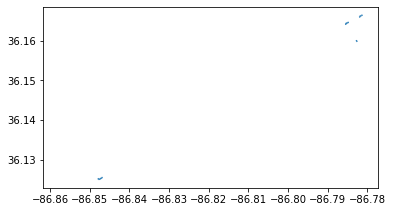

In [18]:
am_jantofeb[am_jantofeb['percent20Secs'] > np.quantile(am_jantofeb['percent20Secs'], .80)].plot()

In [19]:
params2a = {
    'direction':'1',
    'startDate':'02-25-2022',
    'endDate': '03-26-2022',
    'excludeDates': '03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022',
    'beginTime': '06:00',
    'endTime': '09:00',
    'daysOfWeek': '1,2,3,4,5',
    'format':'geojson',
    'resolution':'hiRes',
}


params2b = {
    'direction':'1',
    'startDate':'02-25-2022',
    'endDate': '03-26-2022',
    'excludeDates': '03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022',
    'beginTime': '06:00',
    'endTime': '09:00',
    'daysOfWeek': '1,2,3,4,5',
    #'format':'geojson',
    'resolution':'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [20]:
am_febtomar = concat_frames_columns(requests.get(URL, params = params2a, headers = headers), 
                                      requests.get(URL, params = params2b, headers = headers), "2/25/22-3/26/22")
am_febtomar

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,3.249949,7.466271,20.360,6.140,...,1.806,1.440,39,1.930,2/25/22-3/26/22,6am-9am,m-f,inbound,132,0.295455
1,GEOMETRYCOLLECTION EMPTY,NaN,NaN,NaN,NaN,23.816,1.698782,14.019456,5.045,2.115,...,1.278,0.564,87,1.400,2/25/22-3/26/22,6am-9am,m-f,inbound,132,0.659091
2,"LINESTRING (-86.84323 36.12786, -86.84300 36.1...",HARWOOEN,Harding Pike & Woodlawn Dr Eb,HARVINEN,Harding Pike & Vine Ct Eb,24.851,2.123400,11.703400,7.599,2.859,...,1.498,1.375,40,1.558,2/25/22-3/26/22,6am-9am,m-f,inbound,132,0.303030
3,"LINESTRING (-86.84469 36.12699, -86.84448 36.1...",HARKENEN,West End Ave & Kenner Ave Eb,HARWOOEN,Harding Pike & Woodlawn Dr Eb,24.495,2.250463,10.884427,8.269,3.437,...,1.352,1.012,123,1.513,2/25/22-3/26/22,6am-9am,m-f,inbound,132,0.931818
4,"LINESTRING (-86.81388 36.14390, -86.81369 36.1...",WES31AEM,West End Ave & 31st Ave S Eb,WES28AEM,West End Ave & 28th Ave S Eb,24.297,2.597438,9.354218,5.812,3.699,...,1.751,1.347,89,1.917,2/25/22-3/26/22,6am-9am,m-f,inbound,132,0.674242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,"LINESTRING (-86.82312 36.13552, -86.82291 36.1...",WESELMEN,West End Ave & Elmington Ave Eb,WES440EM,West End Ave & I-440 Ramp Eb,24.392,2.496135,9.771907,35.715,2.786,...,1.627,1.215,126,1.773,2/25/22-3/26/22,6am-9am,m-f,inbound,132,0.954545
557,"LINESTRING (-86.83047 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,2.602400,9.205349,13.134,6.815,...,1.298,1.167,40,1.382,2/25/22-3/26/22,6am-9am,m-f,inbound,132,0.303030
558,"LINESTRING (-86.83714 36.13047, -86.83690 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.722350,13.876970,3.108,2.313,...,1.332,1.165,40,1.424,2/25/22-3/26/22,6am-9am,m-f,inbound,132,0.303030
559,"LINESTRING (-86.78462 36.16286, -86.78474 36.1...",8AVUNINN,8th Ave N & Union St Nb,CHA7AEN,Charlotte Ave & 7th Ave N Eb,24.033,7.202232,3.336882,46.448,15.191,...,2.287,1.970,125,2.608,2/25/22-3/26/22,6am-9am,m-f,inbound,132,0.946970


In [21]:
am_febtomar = am_febtomar[am_febtomar['percent20Secs'] > np.quantile(am_febtomar['percent20Secs'], .80)]

<AxesSubplot:>

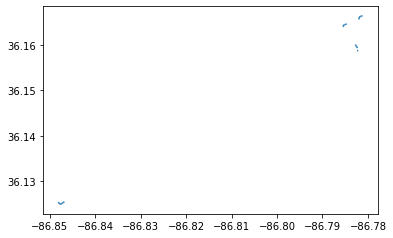

In [22]:
am_febtomar[am_febtomar['percent20Secs'] > np.quantile(am_febtomar['percent20Secs'], .80)].plot()

In [23]:
params3a = {
    'direction':'1',
    'startDate':'03-27-2022',
    'endDate': '04-26-2022',
    'excludeDates': '04-14-2022,04-15-2022',
    'beginTime': '06:00',
    'endTime': '09:00',
    'daysOfWeek': '1,2,3,4,5',
    'format':'geojson',
    'resolution':'hiRes',
}


params3b = {
    'direction':'1',
    'startDate':'03-27-2022',
    'endDate': '04-26-2022',
    'excludeDates': '04-14-2022,04-15-2022',
    'beginTime': '06:00',
    'endTime': '09:00',
    'daysOfWeek': '1,2,3,4,5',
    #'format':'geojson',
    'resolution':'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [24]:
am_martoapr = concat_frames_columns(requests.get(URL, params = params3a, headers = headers), 
                                      requests.get(URL, params = params3b, headers = headers), "3/27/22-4/26/22")
am_martoapr

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.92385 36.07396, -86.92358 36.0...",H70HICEN,Hwy 70 S & Hicks Ln Eb,H70OLDEF,Hwy 70 S & Old Hickory Blvd Eb,24.305,1.640527,14.815361,3.434,1.946,...,1.296,0.530,112,1.438,3/27/22-4/26/22,6am-9am,m-f,inbound,278,0.402878
1,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.791865,8.691323,18.689,4.233,...,1.800,1.401,274,1.946,3/27/22-4/26/22,6am-9am,m-f,inbound,278,0.985612
2,"LINESTRING (-86.93141 36.07377, -86.93114 36.0...",H70COLEM,Hwy 70 S & Colice Jeanne Rd Eb,H70HICEN,Hwy 70 S & Hicks Ln Eb,24.285,1.428369,17.001909,1.801,1.654,...,1.233,1.122,111,1.288,3/27/22-4/26/22,6am-9am,m-f,inbound,278,0.399281
3,"LINESTRING (-86.85175 36.12782, -86.85153 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,2.464059,10.086203,7.300,4.289,...,1.494,1.123,153,1.641,3/27/22-4/26/22,6am-9am,m-f,inbound,278,0.550360
4,"LINESTRING (-86.82550 36.13446, -86.82525 36.1...",WESLEOEN,West End Ave & Leonard Ave Eb,WESELMEN,West End Ave & Elmington Ave Eb,24.572,9.770418,2.514938,85.301,33.954,...,1.567,0.741,268,1.737,3/27/22-4/26/22,6am-9am,m-f,inbound,278,0.964029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,"LINESTRING (-86.87775 36.09626, -86.87751 36.0...",H70PEREN,Hwy 70 S & Percy Warner Blvd Eb,HARHAREN,Harding Pike & Harding Pl Eb,24.744,1.675614,14.767124,23.502,1.665,...,1.121,0.761,114,1.181,3/27/22-4/26/22,6am-9am,m-f,inbound,278,0.410072
1048,"LINESTRING (-86.83047 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,1.950233,12.283660,21.228,2.290,...,1.301,0.644,266,1.391,3/27/22-4/26/22,6am-9am,m-f,inbound,278,0.956835
1049,"LINESTRING (-86.83714 36.13047, -86.83690 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.693736,14.111408,3.975,2.185,...,1.279,0.748,269,1.400,3/27/22-4/26/22,6am-9am,m-f,inbound,278,0.967626
1050,"LINESTRING (-86.84734 36.12513, -86.84714 36.1...",HARWODEN,Harding Pike & Woodmont Blvd,HARKENEN,West End Ave & Kenner Ave Eb,23.943,2.690469,8.899192,4.757,3.987,...,1.798,1.018,113,1.925,3/27/22-4/26/22,6am-9am,m-f,inbound,278,0.406475


In [25]:
am_martoapr = am_martoapr[am_martoapr['percent20Secs'] > np.quantile(am_martoapr['percent20Secs'], .80)]

<AxesSubplot:>

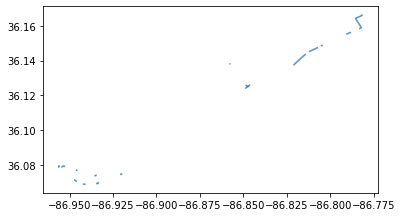

In [26]:
am_martoapr.plot()

In [27]:
params4a = {
    'direction': '1',
    'startDate': '04-27-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '05-25-2022',
    'endTime' : '09:00',
    'format' : 'geojson',
    'resolution': 'hiRes',
}


params4b = {
    'direction': '1',
    'startDate': '04-27-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '05-25-2022',
    'endTime' : '09:00',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [28]:
am_aprtomay = concat_frames_columns(requests.get(URL, params = params4a, headers = headers), 
                                      requests.get(URL, params = params4b, headers = headers), "4/27/22-5/25/22")
am_aprtomay

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.92385 36.07396, -86.92358 36.0...",H70HICEN,Hwy 70 S & Hicks Ln Eb,H70OLDEF,Hwy 70 S & Old Hickory Blvd Eb,24.305,1.757360,13.830405,19.382,2.118,...,1.305,1.077,161,1.381,4/27/22-5/25/22,6am-9am,m-f,inbound,320,0.503125
1,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.586487,9.381451,10.217,4.110,...,1.699,1.466,314,1.890,4/27/22-5/25/22,6am-9am,m-f,inbound,320,0.981250
2,"LINESTRING (-86.93141 36.07377, -86.93114 36.0...",H70COLEM,Hwy 70 S & Colice Jeanne Rd Eb,H70HICEN,Hwy 70 S & Hicks Ln Eb,24.285,1.409444,17.230199,2.660,1.567,...,1.231,0.767,160,1.278,4/27/22-5/25/22,6am-9am,m-f,inbound,320,0.500000
3,"LINESTRING (-86.85175 36.12782, -86.85153 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,2.505006,9.921334,10.602,4.182,...,1.415,0.798,155,1.679,4/27/22-5/25/22,6am-9am,m-f,inbound,320,0.484375
4,"LINESTRING (-86.82550 36.13446, -86.82525 36.1...",WESLEOEN,West End Ave & Leonard Ave Eb,WESELMEN,West End Ave & Elmington Ave Eb,24.572,8.374416,2.934175,81.765,33.336,...,1.491,0.471,315,1.624,4/27/22-5/25/22,6am-9am,m-f,inbound,320,0.984375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,"LINESTRING (-86.83046 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,1.734355,13.812628,25.246,2.028,...,1.282,0.997,310,1.349,4/27/22-5/25/22,6am-9am,m-f,inbound,320,0.968750
1048,"LINESTRING (-86.83714 36.13047, -86.83689 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.689211,14.149209,6.216,2.276,...,1.284,1.048,313,1.366,4/27/22-5/25/22,6am-9am,m-f,inbound,320,0.978125
1049,"LINESTRING (-86.87775 36.09626, -86.87751 36.0...",H70PEREN,Hwy 70 S & Percy Warner Blvd Eb,HARHAREN,Harding Pike & Harding Pl Eb,24.744,1.584044,15.620778,17.110,1.565,...,1.106,1.004,160,1.148,4/27/22-5/25/22,6am-9am,m-f,inbound,320,0.500000
1050,"LINESTRING (-86.85794 36.14930, -86.85794 36.1...",WHICHASF,White Bridge Pike & Charlotte Shone,WHICORSF,White Bridge Pike & Corbett Ln Sb,24.651,2.911820,8.465839,6.148,5.110,...,1.367,0.804,89,1.729,4/27/22-5/25/22,6am-9am,m-f,inbound,320,0.278125


In [29]:
am_aprtomay = am_aprtomay[am_aprtomay['percent20Secs'] > np.quantile(am_aprtomay['percent20Secs'], .80)]

<AxesSubplot:>

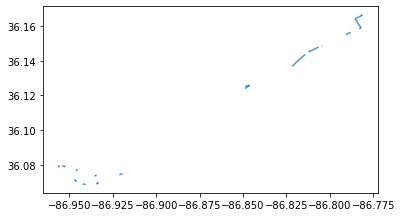

In [30]:
am_aprtomay.plot()

## Summer Months

In [31]:
params5a = {
    'direction':'1',
    'startDate':'05-26-2022',
    'endDate': '06-25-2022',
    'beginTime': '06:00',
    'endTime': '09:00',
    'daysOfWeek': '1,2,3,4,5',
    'format':'geojson',
    'resolution':'hiRes',
}


params5b = {
    'direction':'1',
    'startDate':'05-26-2022',
    'endDate': '06-25-2022',
    'beginTime': '06:00',
    'endTime': '09:00',
    'daysOfWeek': '1,2,3,4,5',
    #'format':'geojson',
    'resolution':'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [32]:
am_maytojun = concat_frames_columns(requests.get(URL, params = params5a, headers = headers), 
                                      requests.get(URL, params = params5b, headers = headers), "5/26/22-6/25/22")
am_maytojun

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.92385 36.07396, -86.92358 36.0...",H70HICEN,Hwy 70 S & Hicks Ln Eb,H70OLDEF,Hwy 70 S & Old Hickory Blvd Eb,24.305,1.601784,15.173706,2.809,1.945,...,1.322,1.125,167,1.387,5/26/22-6/25/22,6am-9am,m-f,inbound,347,0.481268
1,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.621083,9.257624,30.426,3.815,...,1.682,0.962,337,1.828,5/26/22-6/25/22,6am-9am,m-f,inbound,347,0.971182
2,"LINESTRING (-86.93141 36.07377, -86.93114 36.0...",H70COLEM,Hwy 70 S & Colice Jeanne Rd Eb,H70HICEN,Hwy 70 S & Hicks Ln Eb,24.285,1.395699,17.399883,1.875,1.584,...,1.212,1.083,166,1.270,5/26/22-6/25/22,6am-9am,m-f,inbound,347,0.478386
3,"LINESTRING (-86.85175 36.12782, -86.85153 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,2.380140,10.441823,7.827,4.193,...,1.380,0.978,171,1.553,5/26/22-6/25/22,6am-9am,m-f,inbound,347,0.492795
4,"LINESTRING (-86.82550 36.13446, -86.82525 36.1...",WESLEOEN,West End Ave & Leonard Ave Eb,WESELMEN,West End Ave & Elmington Ave Eb,24.572,8.607729,2.854644,76.700,36.398,...,1.428,0.755,329,1.629,5/26/22-6/25/22,6am-9am,m-f,inbound,347,0.948127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,"LINESTRING (-86.83046 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,1.687951,14.192355,5.787,2.190,...,1.273,1.020,329,1.349,5/26/22-6/25/22,6am-9am,m-f,inbound,347,0.948127
1049,"LINESTRING (-86.83714 36.13047, -86.83689 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.653609,14.453840,8.603,2.040,...,1.285,0.829,335,1.358,5/26/22-6/25/22,6am-9am,m-f,inbound,347,0.965418
1050,"LINESTRING (-86.87775 36.09626, -86.87751 36.0...",H70PEREN,Hwy 70 S & Percy Warner Blvd Eb,HARHAREN,Harding Pike & Harding Pl Eb,24.744,1.425602,17.356878,13.784,1.609,...,1.079,0.823,171,1.137,5/26/22-6/25/22,6am-9am,m-f,inbound,347,0.492795
1051,"LINESTRING (-86.85794 36.14930, -86.85794 36.1...",WHICHASF,White Bridge Pike & Charlotte Shone,WHICORSF,White Bridge Pike & Corbett Ln Sb,24.651,2.966126,8.310840,22.776,5.556,...,0.792,0.388,95,1.411,5/26/22-6/25/22,6am-9am,m-f,inbound,347,0.273775


In [33]:
am_maytojun = am_maytojun[am_maytojun['percent20Secs'] > np.quantile(am_maytojun['percent20Secs'], .80)]

<AxesSubplot:>

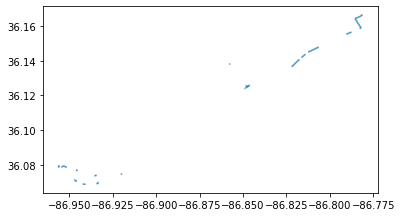

In [34]:
am_maytojun.plot()

In [35]:
params6a = {
    'direction':'1',
    'startDate':'06-26-2022',
    'endDate': '07-26-2022',
    'excludeDate': '07/04/2022',
    'beginTime': '06:00',
    'endTime': '09:00',
    'daysOfWeek': '1,2,3,4,5',
    'format':'geojson',
    'resolution':'hiRes',
}


params6b = {
    'direction':'1',
    'startDate':'06-26-2022',
    'endDate': '07-26-2022',
    'excludeDate': '07/04/2022',
    'beginTime': '06:00',
    'endTime': '09:00',
    'daysOfWeek': '1,2,3,4,5',
    #'format':'geojson',
    'resolution':'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [36]:
am_juntojul = concat_frames_columns(requests.get(URL, params = params6a, headers = headers), 
                                      requests.get(URL, params = params6b, headers = headers), "6/26/22-7/26/22")
am_juntojul

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.92385 36.07396, -86.92358 36.0...",H70HICEN,Hwy 70 S & Hicks Ln Eb,H70OLDEF,Hwy 70 S & Old Hickory Blvd Eb,24.305,1.579181,15.390889,3.634,1.907,...,1.294,0.777,160,1.389,6/26/22-7/26/22,6am-9am,m-f,inbound,327,0.489297
1,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.579047,9.408514,17.390,3.979,...,1.658,1.318,317,1.785,6/26/22-7/26/22,6am-9am,m-f,inbound,327,0.969419
2,"LINESTRING (-86.93141 36.07377, -86.93114 36.0...",H70COLEM,Hwy 70 S & Colice Jeanne Rd Eb,H70HICEN,Hwy 70 S & Hicks Ln Eb,24.285,1.446386,16.790124,3.532,1.632,...,1.228,1.144,158,1.290,6/26/22-7/26/22,6am-9am,m-f,inbound,327,0.483180
3,"LINESTRING (-86.85175 36.12782, -86.85153 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,2.162376,11.493376,5.366,3.779,...,1.341,1.033,165,1.443,6/26/22-7/26/22,6am-9am,m-f,inbound,327,0.504587
4,"LINESTRING (-86.82550 36.13446, -86.82525 36.1...",WESLEOEN,West End Ave & Leonard Ave Eb,WESELMEN,West End Ave & Elmington Ave Eb,24.572,6.948899,3.536100,76.658,23.171,...,1.452,0.734,318,1.552,6/26/22-7/26/22,6am-9am,m-f,inbound,327,0.972477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,"LINESTRING (-86.87775 36.09626, -86.87751 36.0...",H70PEREN,Hwy 70 S & Percy Warner Blvd Eb,HARHAREN,Harding Pike & Harding Pl Eb,24.744,2.845957,8.694439,140.224,1.564,...,1.107,0.777,162,1.147,6/26/22-7/26/22,6am-9am,m-f,inbound,327,0.495413
1048,"LINESTRING (-86.83046 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,1.598453,14.986991,4.523,1.874,...,1.267,0.965,318,1.335,6/26/22-7/26/22,6am-9am,m-f,inbound,327,0.972477
1049,"LINESTRING (-86.83714 36.13047, -86.83689 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.598844,14.948926,3.695,2.066,...,1.240,0.962,321,1.329,6/26/22-7/26/22,6am-9am,m-f,inbound,327,0.981651
1050,"LINESTRING (-86.84734 36.12513, -86.84714 36.1...",HARWODEN,Harding Pike & Woodmont Blvd,HARKENEN,West End Ave & Kenner Ave Eb,23.943,2.704179,8.854074,10.490,3.929,...,1.637,1.259,162,1.816,6/26/22-7/26/22,6am-9am,m-f,inbound,327,0.495413


In [37]:
am_juntojul = am_juntojul[am_juntojul['percent20Secs'] > np.quantile(am_juntojul['percent20Secs'], .80)]

<AxesSubplot:>

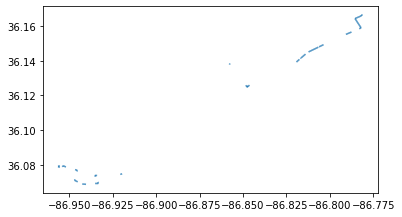

In [38]:
am_juntojul.plot()

In [41]:
r3_ampeak_inschool = pd.concat([am_jantofeb, am_febtomar, am_martoapr, am_aprtomay], keys = ['am_jantofeb', 'am_febtomar', 'am_martoapr', 'am_aprtomay'])
r3_ampeak_inschool_gj = r3_ampeak_inschool['geometry'].to_json()

r3_ampeak_summer = pd.concat([am_maytojun, am_juntojul])
r3_ampeak_summer_gj = r3_ampeak_summer['geometry'].to_json()

mapdawg = folium.Map(location = [36.19, -86.7775], zoom_start = 12)

In [42]:
style1 = {'color' : 'red', 'weight' : 6}
style2 = {'color' : 'blue', 'weight' : 3}
folium.GeoJson(r3_ampeak_inschool_gj, style_function = lambda x:style1).add_to(mapdawg)
folium.GeoJson(r3_ampeak_summer_gj, style_function = lambda x:style2).add_to(mapdawg)
mapdawg